## Fraud Detection Model using paysim dataset


### The columns are:

  -step (numerical): Unit of time in the real world. In this case 1 step is 1 hour of time.

  -type (categorical): CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
  
  -amount (numerical): amount of the transaction
  
  -nameOrig: customer who started the transaction
  
  -oldbalanceOrg (numerical): initial balance before the transaction
  
  -newbalanceOrig (numerical): customer's balance after the transaction.
  
  -nameDest: recipient ID of the transaction.
  
  -oldbalanceDest (numerical): initial recipient balance before the transaction.
  
  -newbalanceDest (numerical): recipient's balance after the transaction.
  
  -isFraud (boolean): identifies a fraudulent transaction (1) and non fraudulent (0)
  
  -isFlaggedFraud (boolean): flags illegal attempts to transfer more  in a single transaction.
  
  *Number of rows: 6.362620e+06


### Content:
1. Load the Data
  - Import libraries
  - Load the datasets
  
2. Overview of the Data
  - Descriptive Statistics
  - Missing Values
  
3. Exploratory Data Analysis
  - Create list of columns by data type
  - Check the distribution of target class
  - Check the distribution of every feature
  - Check how differnt numerical features are realated to target class
  
4. Data Preparation
- Clean the data
- Categorize the "isFraud"
- Split the dataset in X and y dataset
- Resampling using Smote
- Split the data in train and test set
  
5. Model Building
  - Train Model
  - Model Prediction
  - Model Evaluation
  
7. Improve Model
  
 Conclusion

## 1. Load the Data

In this section you will:

- Import the libraries
- Load the dataset

### 1.1. Import Libraries

Import all the libraries in the first cell itself

In [ ]:
# Import libraries 

# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import cross_val_score,train_test_split
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   imblearn.over_sampling import SMOTE

### 1.2. Load the datasets

Load the dataset using pd.read_csv()

In [ ]:
# Read data in form of a csv file
dframe = pd.read_csv('/content/drive/MyDrive/paysim/paysimdataset.csv')
df=dframe
# First 5 rows of the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# 2. Overview of the Data

Before attempting to solve the problem, it's very important to have a good understanding of data.

In this section you will:
- Get the descriptive statistics of the data
- Get the information about missing values in the data

### 2.1. Descriptive Statistics

As the name says descriptive statistics describes the data. It gives you information about
- Mean, median, mode 
- Min, max
- Count etc

Let's understand the data we have

In [ ]:
# Dimension of the data
df.shape

(6362620, 11)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Summary of the dataset
# Descriptive statistics
df.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,399.000,4.900000e+02,6.810000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,365423.309,5.186342e+05,1.615979e+06,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,1822508.289,5.823702e+06,1.602726e+07,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,1970344.793,5.980262e+06,1.617616e+07,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,2914266.669,5.147230e+06,1.237182e+07,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3194869.671,5.515716e+06,1.313787e+07,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,0.000,0.000000e+00,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,0.000,0.000000e+00,0.000000e+00,1.000000e+00


### 2.2 Missing Values

Get the info about missing values in the dataframe

In [ ]:
# Missing values for every column
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# 3. Exploratory Data Analaysis

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:
- Create list of columns by data type
- Check the distribution of target class
- Check the distribution of every feature
- Check how differnt numerical features are realated to target class

### 3.1. Extract data types of columns

It's better to get the list of columns by data types in the start itself. You won't have to manually write the name of columns while performing certain operations. So always get the list of columns in the start itself.

In [ ]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
# Remove unnecessary columns
df = df.drop(columns = ['nameOrig','nameDest'], axis = 1)

###3.2.Check the distribution of target class

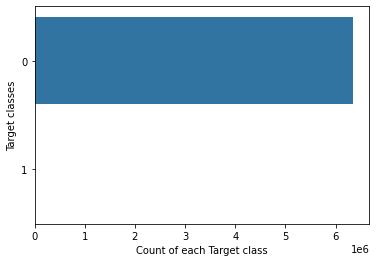

In [ ]:
# Check distribution of target class
sns.countplot(y=df['isFraud'] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

### 3.3. Check the distribution of every feature

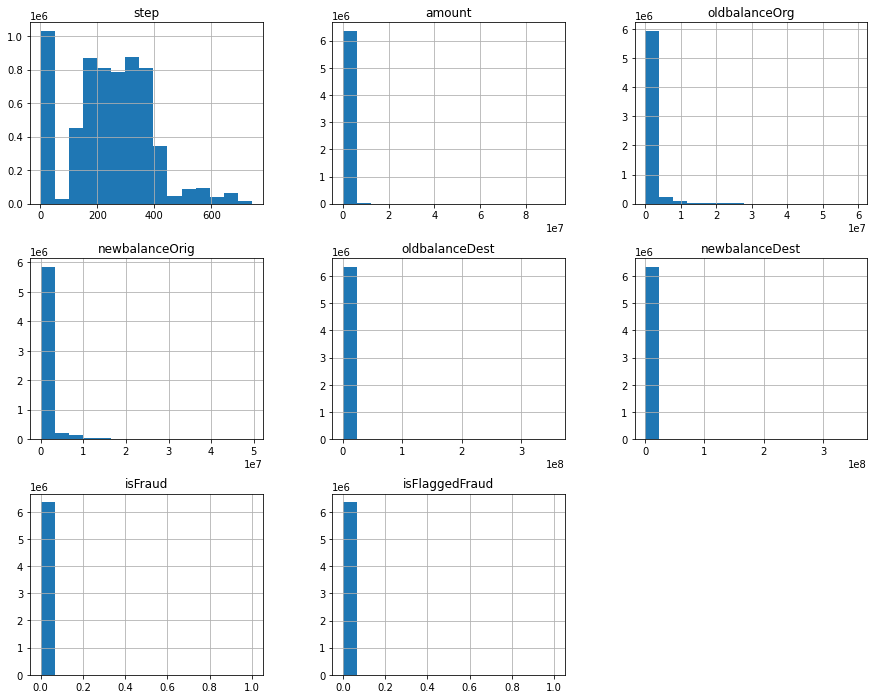

In [ ]:
# Check the distribution of all the features
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

##3.4.Checking the correlation

In [ ]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


##4. Data Preparation

The data is not yet ready for model building. You need to process the data and make it ready for model building

In this section you will:
- Clean the data
- Categorize the "isFraud"
- Split the dataset in X and y dataset
- Resampling using Smote
- Split the data in train and test set

### Categorize the "isFraud"

In [ ]:

categorizing_isFraud=df['isFraud'].value_counts()
print(categorizing_isFraud)

notFraud  = df[df['isFraud'] == 0]
print(notFraud.head())
fraud = df[df['isFraud']==1]
print(fraud.head())


0    6354407
1       8213
Name: isFraud, dtype: int64
   step     type    amount  ...  newbalanceDest  isFraud  isFlaggedFraud
0     1  PAYMENT   9839.64  ...             0.0        0               0
1     1  PAYMENT   1864.28  ...             0.0        0               0
4     1  PAYMENT  11668.14  ...             0.0        0               0
5     1  PAYMENT   7817.71  ...             0.0        0               0
6     1  PAYMENT   7107.77  ...             0.0        0               0

[5 rows x 9 columns]
     step      type   amount  ...  newbalanceDest  isFraud  isFlaggedFraud
2       1  TRANSFER    181.0  ...             0.0        1               0
3       1  CASH_OUT    181.0  ...             0.0        1               0
251     1  TRANSFER   2806.0  ...             0.0        1               0
252     1  CASH_OUT   2806.0  ...             0.0        1               0
680     1  TRANSFER  20128.0  ...             0.0        1               0

[5 rows x 9 columns]


## Split X and Y

In [ ]:
X = df.iloc[:,[0,2,3,4,5,6]]
Y = df.iloc[:,-2]



## Train Test Split

In [ ]:
# spliting data into 80:20

X_train,X_test,Y_train,Y_test=train_test_split(X, Y, train_size=0.8,  random_state=100)


In [ ]:
X_train.shape,Y_train.shape

((5090096, 6), (5090096,))

In [ ]:
Y_train.value_counts()

0    5083512
1       6584
Name: isFraud, dtype: int64

In [ ]:
X_test.shape,Y_test.shape

((1272524, 6), (1272524,))

In [ ]:
Y_test.value_counts()

0    1270895
1       1629
Name: isFraud, dtype: int64

# SMOTE

In [ ]:
smt = SMOTE(k_neighbors=1)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, Y_train)
Y_train_sm.value_counts()

1    5083512
0    5083512
Name: isFraud, dtype: int64

In [ ]:
smt = SMOTE(k_neighbors=1)
X_test_sm, Y_test_sm = smt.fit_resample(X_test, Y_test)
Y_test_sm.value_counts()

1    1270895
0    1270895
Name: isFraud, dtype: int64

##5,Model building
##1.training different models 
##2.model predictions
##3.model evaluations

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
Mreg = LinearRegression().fit(X,Y)
Mreg

LinearRegression()

In [ ]:
r_sq = Mreg.score(X,Y)
print('coeffieicent of determination:', r_sq)

coeffieicent of determination: 0.15577260559543338


# Logistic Regression

In [ ]:
from sklearn import preprocessing
from sklearn import utils
#from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics
model = LogisticRegression()
print(model)

model = model.fit(X_train,Y_train )
ms = model.score(X_train,Y_train)
print("model score::",ms)

probability = model.predict_proba(X_test)
print(probability)
print("*" * 100)
print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))

LogisticRegression()
model score:: 0.9982513099949392
[[1.00000000e+000 1.58375181e-132]
 [1.00000000e+000 1.35808777e-075]
 [1.00000000e+000 1.77496095e-141]
 ...
 [9.99325506e-001 6.74493725e-004]
 [9.99999269e-001 7.31258051e-007]
 [9.84339321e-001 1.56606786e-002]]
****************************************************************************************************
Confusion Matrix
[[1269584    1311]
 [    925     704]]


In [ ]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270895
           1       0.35      0.43      0.39      1629

    accuracy                           1.00   1272524
   macro avg       0.67      0.72      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524



## Heatmap of Confusion Matrix

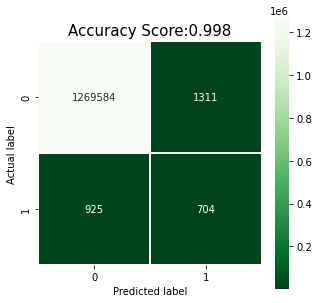

In [ ]:
import seaborn as sns
cm = metrics.confusion_matrix(Y_test , predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);

# ROC Curve

0.8852267442187771


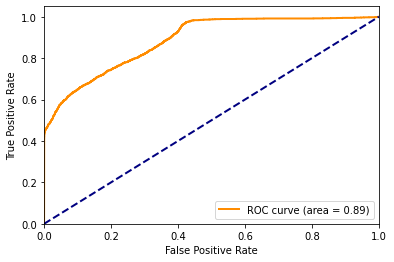

In [ ]:
from sklearn import metrics
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure()
fpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#6.Improvising the model

## Sampling according to 'Fraud'

In [ ]:
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0
3,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0


In [ ]:
dfinput = fraud.iloc[:,[0,2,3,4,5,6]]
dfoutput = fraud.iloc[:,-2]

In [ ]:
dfinput_train,dfinput_test,dfoutput_train,dfoutput_test=train_test_split(dfinput, dfoutput, train_size=0.8,  random_state=100)

In [ ]:
dfinput_train.shape

(6570, 6)

In [ ]:
dfoutput_train.value_counts()

1    6570
Name: isFraud, dtype: int64

In [ ]:
# %whos

In [ ]:
notFraud.shape
    

(6354407, 9)

In [ ]:
fraud.shape

(8213, 9)

## Over Sampling 

In [ ]:
over = fraud.sample(n=6354407, replace = True)

In [ ]:
over.shape

(6354407, 9)

In [ ]:
Bal_df = pd.concat([notFraud,over])
Bal_df['isFraud'].value_counts()

1    6354407
0    6354407
Name: isFraud, dtype: int64

##selecting sample from data

In [ ]:
Bal_df_samp = Bal_df.sample(n=50)

In [ ]:
Bal_df_samp.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.012773,0.040851,0.031801,-0.115626,-0.065265,0.265577,NaN
amount,0.012773,1.000000,0.035420,-0.148907,-0.182709,0.137796,0.471561,NaN
oldbalanceOrg,0.040851,0.035420,1.000000,0.982571,0.508422,0.407663,-0.197701,NaN
newbalanceOrig,0.031801,-0.148907,0.982571,1.000000,0.541318,0.383937,-0.293686,NaN
oldbalanceDest,-0.115626,-0.182709,0.508422,0.541318,1.000000,0.850022,-0.398278,NaN
newbalanceDest,-0.065265,0.137796,0.407663,0.383937,0.850022,1.000000,-0.215100,NaN
isFraud,0.265577,0.471561,-0.197701,-0.293686,-0.398278,-0.215100,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Bal_df_samp = Bal_df_samp.drop(['type','newbalanceDest','isFlaggedFraud'], axis = 1)
Bal_df_samp.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud
6248334,596,196385.55,196385.55,0.00,0.00,1
2890975,228,24195.86,85562.22,61366.36,0.00,0
4376577,311,1275236.30,1275236.30,0.00,0.00,1
2735160,212,20065.99,8956795.13,8976861.12,983238.55,0
855227,41,1270564.34,1270564.34,0.00,0.00,1


In [ ]:
Bal_df_samp.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud
step,1.000000,0.012773,0.040851,0.031801,-0.115626,0.265577
amount,0.012773,1.000000,0.035420,-0.148907,-0.182709,0.471561
oldbalanceOrg,0.040851,0.035420,1.000000,0.982571,0.508422,-0.197701
newbalanceOrig,0.031801,-0.148907,0.982571,1.000000,0.541318,-0.293686
oldbalanceDest,-0.115626,-0.182709,0.508422,0.541318,1.000000,-0.398278
isFraud,0.265577,0.471561,-0.197701,-0.293686,-0.398278,1.000000


In [ ]:
Bal_df_samp.cov()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud
step,2.907299e+04,1.971939e+06,3.444115e+07,2.729304e+07,-2.211398e+07,22.706122
amount,1.971939e+06,8.197470e+11,1.585716e+11,-6.786139e+11,-1.855531e+11,214084.410661
oldbalanceOrg,3.444115e+07,1.585716e+11,2.444926e+13,2.445478e+13,2.819842e+12,-490172.984882
newbalanceOrig,2.729304e+07,-6.786139e+11,2.445478e+13,2.533575e+13,3.056235e+12,-741238.760343
oldbalanceDest,-2.211398e+07,-1.855531e+11,2.819842e+12,3.056235e+12,1.258156e+12,-224006.653404
isFraud,2.270612e+01,2.140844e+05,-4.901730e+05,-7.412388e+05,-2.240067e+05,0.251429


In [ ]:
Bal_df_samp['isFraud'].value_counts()


1    28
0    22
Name: isFraud, dtype: int64

In [ ]:
X = Bal_df_samp.iloc[:,[1,2,3,4]]
Y = Bal_df_samp.iloc[:,-1]

In [ ]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest
6248334,196385.55,196385.55,0.00,0.00
2890975,24195.86,85562.22,61366.36,0.00
4376577,1275236.30,1275236.30,0.00,0.00
2735160,20065.99,8956795.13,8976861.12,983238.55
855227,1270564.34,1270564.34,0.00,0.00
6080946,1459180.14,1459180.14,0.00,1120598.68
5705892,1230.56,10190172.54,10191403.10,5200722.75
4713511,131055.24,0.00,0.00,217329.46
695414,1684039.12,1684039.12,0.00,0.00
3459626,4373.77,104136.00,99762.23,259975.11


In [ ]:
from sklearn.model_selection import cross_val_score,train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, train_size=0.8)


### Logistic Regression

In [ ]:
from sklearn import preprocessing
from sklearn import utils

model = LogisticRegression()
print(model)

model = model.fit(X_train,Y_train )
ms = model.score(X_train,Y_train)
print("model score::",ms)

probability = model.predict_proba(X_test)
print(probability)
#print("*" * 100)
print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))

LogisticRegression()
model score:: 1.0
[[1.76240522e-01 8.23759478e-01]
 [1.00000000e+00 2.89535811e-12]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.30556879e-79]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00]]
Confusion Matrix
[[3 0]
 [1 6]]


In [ ]:
print(metrics.classification_report(Y_test, predicted))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



Heatmap of Confusion Matrix

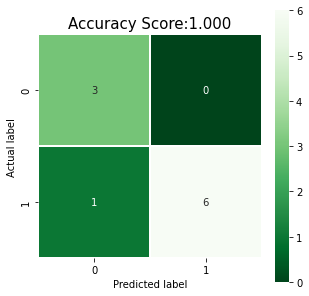

In [ ]:
import seaborn as sns
cm = metrics.confusion_matrix(Y_test , predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);

### ROC Curve

1.0


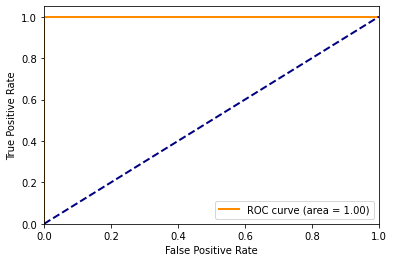

In [ ]:
from sklearn import metrics
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure()
fpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


### SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
C = 1.0 # SVM regularization parameter

svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, Y)
predicted= svc.predict(X)
score = accuracy_score(Y,predicted)
print("Your Model Accuracy is", score)



Your Model Accuracy is 1.0


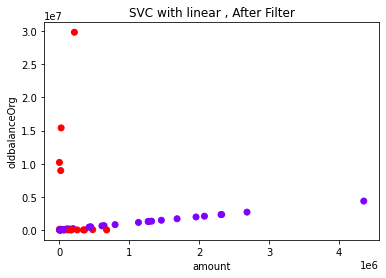

In [ ]:
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=Y, cmap=plt.cm.rainbow_r)
plt.xlabel('amount')
plt.ylabel('oldbalanceOrg')
plt.title('SVC with linear , After Filter')
plt.show()


## Conclusion: 
 As target variable is discrete binary it is better to go with logistic,SVM and with some classifications algorithms.the dataset is huge and distribution of target variable is not uniform .so i took a sample and used smote for oversampling for uniform distribution of target variable.As usual performed modelling.